In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)

'''
In 'data' all unknown BCUs are assigned 0. 
All BLLs are assigned 1 and all FSRQs are assigned 2.
Radio Galaxies = 3 and Other = 4
'''

mask1 = data['CLASS1'] == 4
mask2 = data['CLASS1'] == 0
mask3 = data['CLASS1'] == 3
data = data[~mask1]
data = data[~mask2]
data = data[~mask3]

''' JOINING BLLs AND FSRQs INTO A SINGLE CATEGORY '''

#data = data.replace(2,1)

data = data.dropna()
data = data.reset_index()

print(len(data['CLASS1']))
data_test = data[~(data['CLASS1'] == 1)]
print(len(data_test['CLASS1']))
print(data.columns)

1383
470
Index(['index', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Energy_Flux100',
       'PL_Flux_Density', 'PL_Index', 'LP_Flux_Density', 'LP_Index', 'LP_beta',
       'LP_SigCurv', 'LP_EPeak', 'PLEC_Flux_Density', 'PLEC_IndexS',
       'PLEC_ExpfactorS', 'PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred',
       'Variability_Index', 'Frac_Variability', 'ASSOC_PROB_BAY',
       'ASSOC_PROB_LR', 'Flux_Band_0', 'Flux_Band_1', 'Flux_Band_2',
       'Flux_Band_3', 'Flux_Band_4', 'Flux_Band_5', 'Flux_Band_6',
       'Flux_Band_7', 'nuFnu_Band_0', 'nuFnu_Band_1', 'nuFnu_Band_2',
       'nuFnu_Band_3', 'nuFnu_Band_4', 'nuFnu_Band_5', 'nuFnu_Band_6',
       'nuFnu_Band_7', 'Sqrt_TS_Band_2', 'Sqrt_TS_Band_3', 'Sqrt_TS_Band_4',
       'Sqrt_TS_Band_5', 'Flux_History_0', 'Flux_History_1', 'Flux_History_2',
       'Flux_History_3', 'Flux_History_4', 'Flux_History_5', 'Flux_History_6',
       'Flux_History_7', 'Sqrt_TS_History_0', 'Sqrt_TS_History_1',
       'Sqrt_TS_History_2', 'Sqrt_TS_History_3', 'Sq

C:\Users\ioanp\AppData\Local\Temp\ipykernel_13896\1457274526.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~mask2]
C:\Users\ioanp\AppData\Local\Temp\ipykernel_13896\1457274526.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~mask3]


We will split the dataset (obtained from sklearn load_digits) into a training and test set using the code below 

In [8]:

X = data.loc[:, data.columns != 'CLASS1']
Y = data['CLASS1']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4) 
# test_size set the proportion of data to use as test data. The rest of the data will be used as training data

'''HIGHLY RECOMMENDED TO SCALE TRAINING DATA '''

scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  



In [9]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)


RandomForestClassifier()

Now testing the model:

In [10]:
y_pred = RF.predict(x_test)
y_proba = RF.predict_proba(x_test)

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
print('The Random Forest accuracy is ' + str(accuracy))
print('The Random Forest Confusion Matrix is:')
print(confusion)


The Random Forest accuracy is 91.08433734939759
The Random Forest Confusion Matrix is:
[[253  14]
 [ 23 125]]


0          (0.958, 1.0]
1         (0.708, 0.75]
2      (-0.001, 0.0417]
3      (0.0417, 0.0833]
4      (-0.001, 0.0417]
             ...       
410    (-0.001, 0.0417]
411    (-0.001, 0.0417]
412       (0.75, 0.792]
413    (-0.001, 0.0417]
414    (-0.001, 0.0417]
Name: p_2, Length: 415, dtype: category
Categories (24, interval[float64, right]): [(-0.001, 0.0417] < (0.0417, 0.0833] < (0.0833, 0.125] < (0.125, 0.167] ... (0.833, 0.875] < (0.875, 0.917] < (0.917, 0.958] < (0.958, 1.0]]


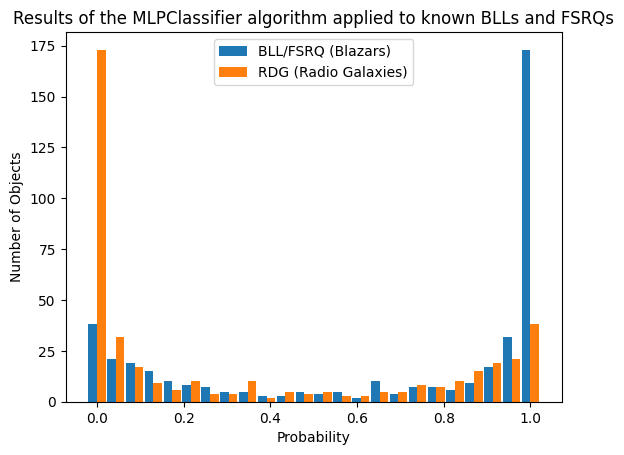

In [12]:
import matplotlib.pyplot as plt
#print(y_proba)
probs = pd.DataFrame(y_proba,columns=('p_1','p_2'))
bin_probs_1 = pd.cut(probs['p_1'],np.linspace(0,1,25),include_lowest=True)
bin_probs_2 = pd.cut(probs['p_2'],np.linspace(0,1,25    ),include_lowest=True)

print(bin_probs_2)

fig, ax = plt.subplots()
x_axis = np.linspace(0,1,len(bin_probs_1.value_counts()))

ax.bar(x_axis-0.01,bin_probs_1.value_counts(sort=False), width=0.02,label='BLL/FSRQ (Blazars)')
ax.bar(x_axis+0.01,bin_probs_2.value_counts(sort=False),width=0.02,label='RDG (Radio Galaxies)')
ax.legend()
ax.set_xlabel('Probability')
ax.set_ylabel('Number of Objects')
ax.set_title('Results of the MLPClassifier algorithm applied to known BLLs and FSRQs')

plt.show()